In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
#df.info()

In [4]:
df.sample(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2311,8552-OBVRU,Female,1,Yes,Yes,48,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.50,5068.05,No
4247,5161-UBZXI,Male,0,Yes,Yes,69,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),106.35,7261.75,No
1208,5494-HECPR,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.25,80.25,Yes
6468,2599-CZABP,Male,0,Yes,No,14,Yes,No,DSL,No,...,No,No,No,No,One year,No,Electronic check,44.60,641.25,No
1441,2480-EJWYP,Female,1,Yes,No,58,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),97.80,5458.8,No
2318,6463-HHXJR,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,No,Bank transfer (automatic),100.50,7030.65,No
2727,3387-VATUS,Male,0,No,No,5,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),94.85,462.8,Yes


In [54]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
def col(df):
    numerical_values = []
    categorical_values = []
    
    for i in df.columns:
        if df[i].dtype == 'object':
            categorical_values.append(i)
        else:
            numerical_values.append(i)
    
    print("Numerical Values:", ', '.join(numerical_values))
    print("\n")
    print("Categorical Values:", ', '.join(categorical_values))


In [6]:
col(df)

Numerical Values: SeniorCitizen, tenure, MonthlyCharges


Categorical Values: customerID, gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, TotalCharges, Churn


# Churn Analysis
- Churn Analysis refers to all the customers who are leaving a service.
- Churn rate, also known as customer attrition rate, refers to the percentage of customers or subscribers who discontinue using a product or service over a specific period of time.
- Churn rate is calculated by dividing the number of customers who stopped using the product or service during a given period by the total number of customers at the beginning of that period

# EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

## Numerical Values

### Age

In [ ]:
df.SeniorCitizen.value_counts()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Count plot for SeniorCitizen with churn information
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axes[0])
axes[0].set(xlabel='Senior Citizen', ylabel='Count', title='Count Plot for Senior Citizen with Churn')

# Count plot for gender with churn information
sns.countplot(data=df, x='gender', hue='Churn', ax=axes[1])
axes[1].set(xlabel='Gender', ylabel='Count', title='Count Plot for Gender with Churn')

# Violin plot for gender, MonthlyCharges, and Churn
sns.violinplot(x='SeniorCitizen', y='MonthlyCharges', hue='Churn', data=df, split=True, ax=axes[2])
axes[2].set(xlabel='SeniorCitizen', ylabel='Monthly Charges', title='Violin Plot for SeniorCitizen, MonthlyCharges, and Churn')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


- no of non senior citizen is higher
- percentage of churning customers is higher in non senior citizen
- The distributions of males and females exhibit a comparable balance, as do the distributions of churning customers within these gender groups.
- Non-senior citizens are most likely to have monthly charges around 20 dollars

### Tenure
Number of months the customer has stayed with the company

In [ ]:
df.tenure.value_counts()

In [ ]:
sns.kdeplot(data = df,
              x = 'tenure',
            hue  = 'Churn')

In [ ]:
def tenure_groups(df):
    if df.tenure <= 12:
        return "less_than_1"
    elif (df.tenure > 12) & (df.tenure <= 24):
        return "less_than_2"
    elif (df.tenure > 24) & (df.tenure <= 36):
        return "less_than_3"
    elif (df.tenure > 36) & (df.tenure <= 48):
        return "less_than_4"
    elif (df.tenure > 48) & (df.tenure <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"

In [ ]:
df1 = df

In [ ]:
df1['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data = df1,
             x = 'grouped_tenure',
             hue = 'Churn')

- we can see the density around the initial stage. so we can assume that customers who churn have a tenure of about 12 to 24 months

### MonthlyCharges
The amount charged to the customer monthly

In [ ]:
sns.histplot(data = df,
             x = 'MonthlyCharges',
             hue = 'Churn',
            kde = True,
            binwidth=10)

Customers starts to churn when the monthly charges go beyond 70.

## Categorical Values

In [ ]:
separate_num_cat(df)

### Partner_Dependents

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Count plot for SeniorCitizen with churn information
sns.countplot(data=df, x='Partner', hue='Churn', ax=axes[0,0])
axes[0,0].set(xlabel='Partner', ylabel='Count', title='Count Plot for partner with Churn')

# Count plot for gender with churn information
sns.countplot(data=df, x='Dependents', hue='Churn', ax=axes[0,1])
axes[0,1].set(xlabel='Dependents', ylabel='Count', title='Count Plot for Dependents with Churn')

# Violin plot for gender, MonthlyCharges, and Churn
sns.violinplot(x='Partner', y='MonthlyCharges', hue='Churn', data=df, split=True, ax=axes[1,0])
axes[1,0].set(xlabel='Partner', ylabel='Monthly Charges', title='Violin Plot for Partner, MonthlyCharges, and Churn')

# Violin plot for Dependents, MonthlyCharges, and Churn
sns.violinplot(x='Dependents', y='MonthlyCharges', hue='Churn', data=df, split=True, ax=axes[1,1])
axes[1,0].set(xlabel='Dependents', ylabel='Monthly Charges', title='Violin Plot for Dependents, MonthlyCharges, and Churn')

plt.pie(df.Partner.value_counts(), labels = ['No Partner', 'Partner'], autopct = '%.1f%%', radius = 1, startangle = 90)
plt.title('Partner Composition of Overall Data')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

- married couples exhibit a lesser churning rate than the unmarried.

### Dependents
Whether the customer has dependents or not (Yes, No)

In [ ]:
plt.pie(df.Partner.value_counts(), labels = ['No Partner', 'Partner'], autopct = '%.2f%%', radius = 1, startangle = 90)
plt.title('Partner Composition of Overall Data')

In [ ]:
plt.pie(df.Dependents.value_counts(), labels = ['No Dependents', 'Dependents'], autopct = '%.2f%%', radius = 1,)
plt.title('Dependent Composition of Overall Data')

### PhoneService
Whether the customer has a phone service or not (Yes, No)

### MultipleLines
Whether the customer has multiple lines or not (Yes, No, No phone service)


since MultipleLines has included a subset of phone service lets ignore phone service

In [ ]:
col(df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the pie chart in the first subplot
axs[0,0].pie(df.MultipleLines.value_counts(), labels=['Singleline', 'MultipleLines', 'No PhoneService' ], autopct='%.2f%%', radius=1)
axs[0,0].set_title('MultipleLines Composition of Overall Data')

# Plot the countplot in the second subplot
sns.countplot(data=df, x='MultipleLines', hue='Churn', ax=axs[0,1])
axs[0,1].set_title('Churn by MultipleLines')

# Plot the violinplot in the third subplot
sns.violinplot(data=df, x='MultipleLines', y='MonthlyCharges', split=True, hue="Churn", ax=axs[0,2])
axs[0,2].set_title('Churn by MultipleLines')

# Plot the pie chart in the fourth subplot
axs[1,0].pie(df.InternetService.value_counts(), labels=['Fibre', 'DSL', 'Other'], autopct='%.2f%%', radius=1)
axs[1,0].set_title('Internet Service Composition of Overall Data')

# Plot the countplot in the fifth subplot
sns.countplot(data=df, x='Churn', hue='InternetService', ax=axs[1,1])
axs[1,1].set_title('Churn by InternetService')

# Plot the violinplot in the third subplot
sns.violinplot(data=df, x='InternetService', y='MonthlyCharges', split=True, hue="Churn", ax=axs[1,2])
axs[1,2].set_title('Churn by InternetService')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# And there are other features in the dataset which i Have to explore, since there is a time constraint im gonna ignore it for now

# Model Building

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

## feature engineering

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
#removing unwanted columns
df1 = df[df.columns[2:]]

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [15]:
#Converting Target variable from cat to num
df1.Churn.replace({"Yes":1, "No":0}, inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11852\2265986304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Churn.replace({"Yes":1, "No":0}, inplace = True)


In [16]:
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [21]:
categorical_vars = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [22]:
df2 = df1.drop(df1[categorical_vars], axis = 1)

In [23]:
dummy_df = pd.get_dummies(df1[categorical_vars])

In [24]:
dummy_df.head()

,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [29]:
# Concatenate the original DataFrame with the dummy variables
dummy_df2 = pd.concat([df2, dummy_df], axis=1)

In [70]:
dummy_df2.isna().sum()

SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                             0
OnlineBackup_No internet service  

In [72]:
from sklearn.impute import SimpleImputer

# Create an imputer for numerical columns (e.g., 'tenure' and 'MonthlyCharges')
num_imputer = SimpleImputer(strategy='mean')

# Impute missing values for numerical columns
dummy_df2['TotalCharges'] = num_imputer.fit_transform(dummy_df2[['TotalCharges']])

In [73]:
dummy_df2.Churn.head(2)

0    0
1    0
Name: Churn, dtype: int64

In [74]:
dummy_df2 = dummy_df2.replace(' ', np.nan)

<AxesSubplot:>

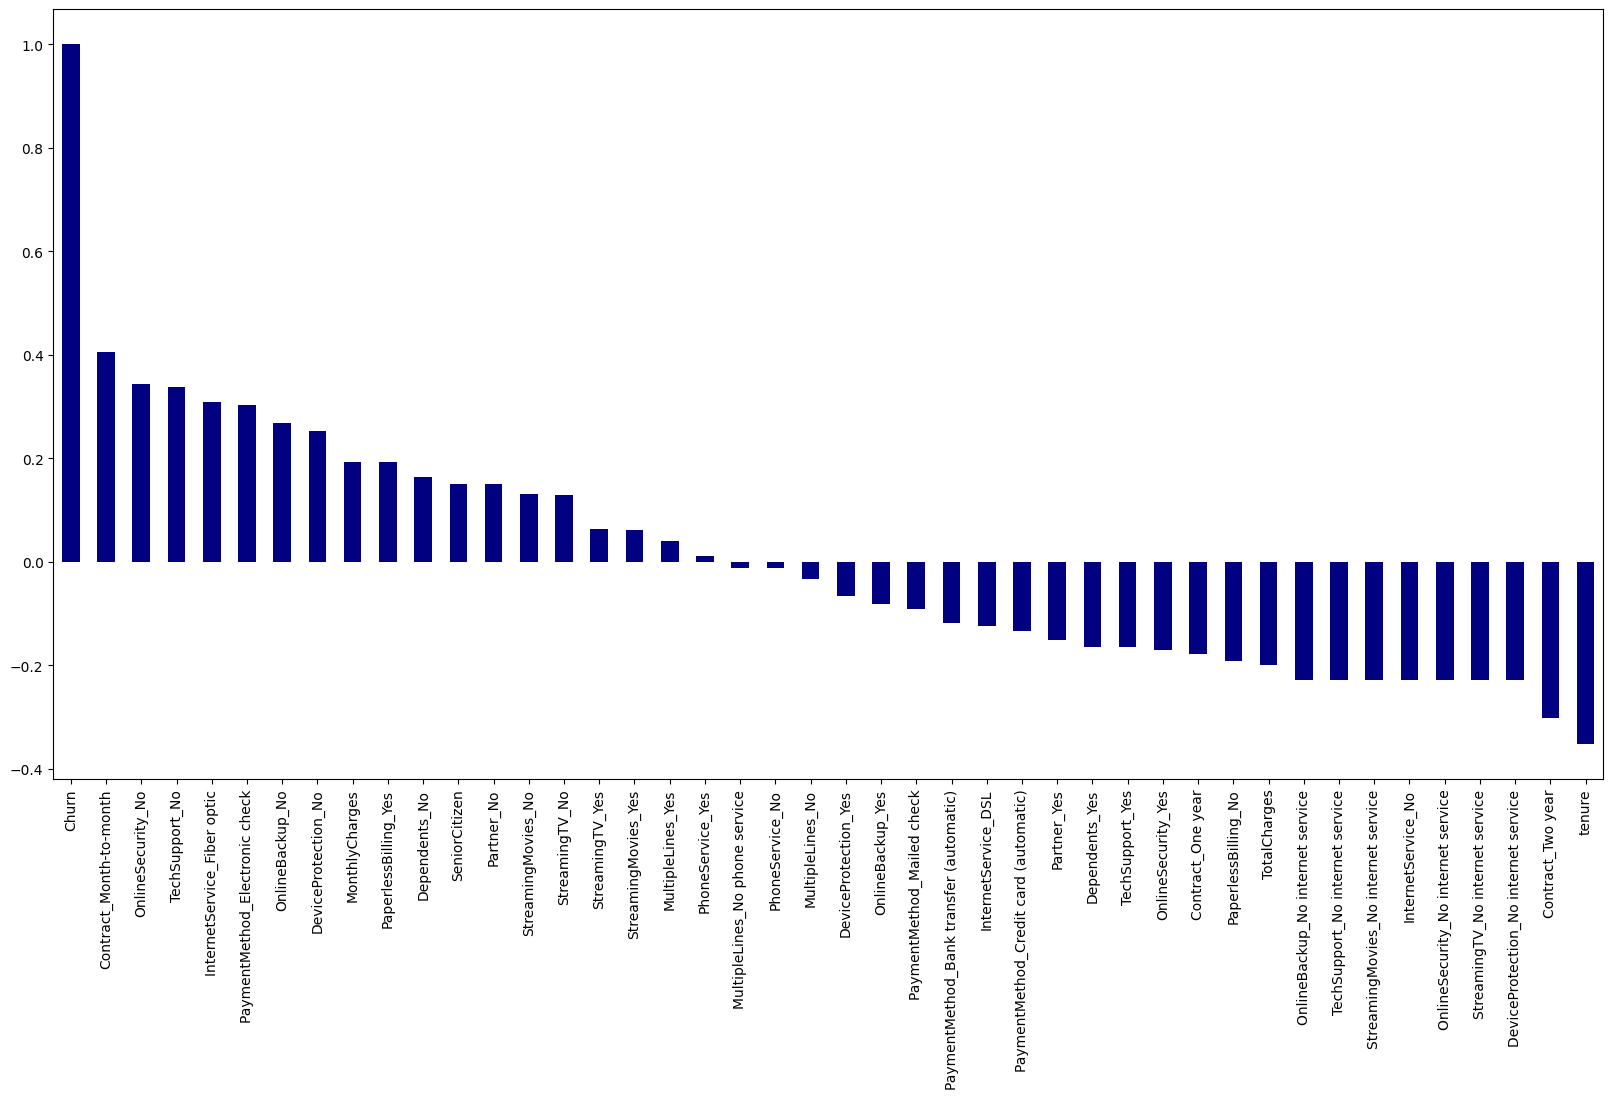

In [75]:
#Plot correlations between our features and our target feature, churn, as a bar plot, sort by descending order
dummy_df2.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20, 10), color='navy')

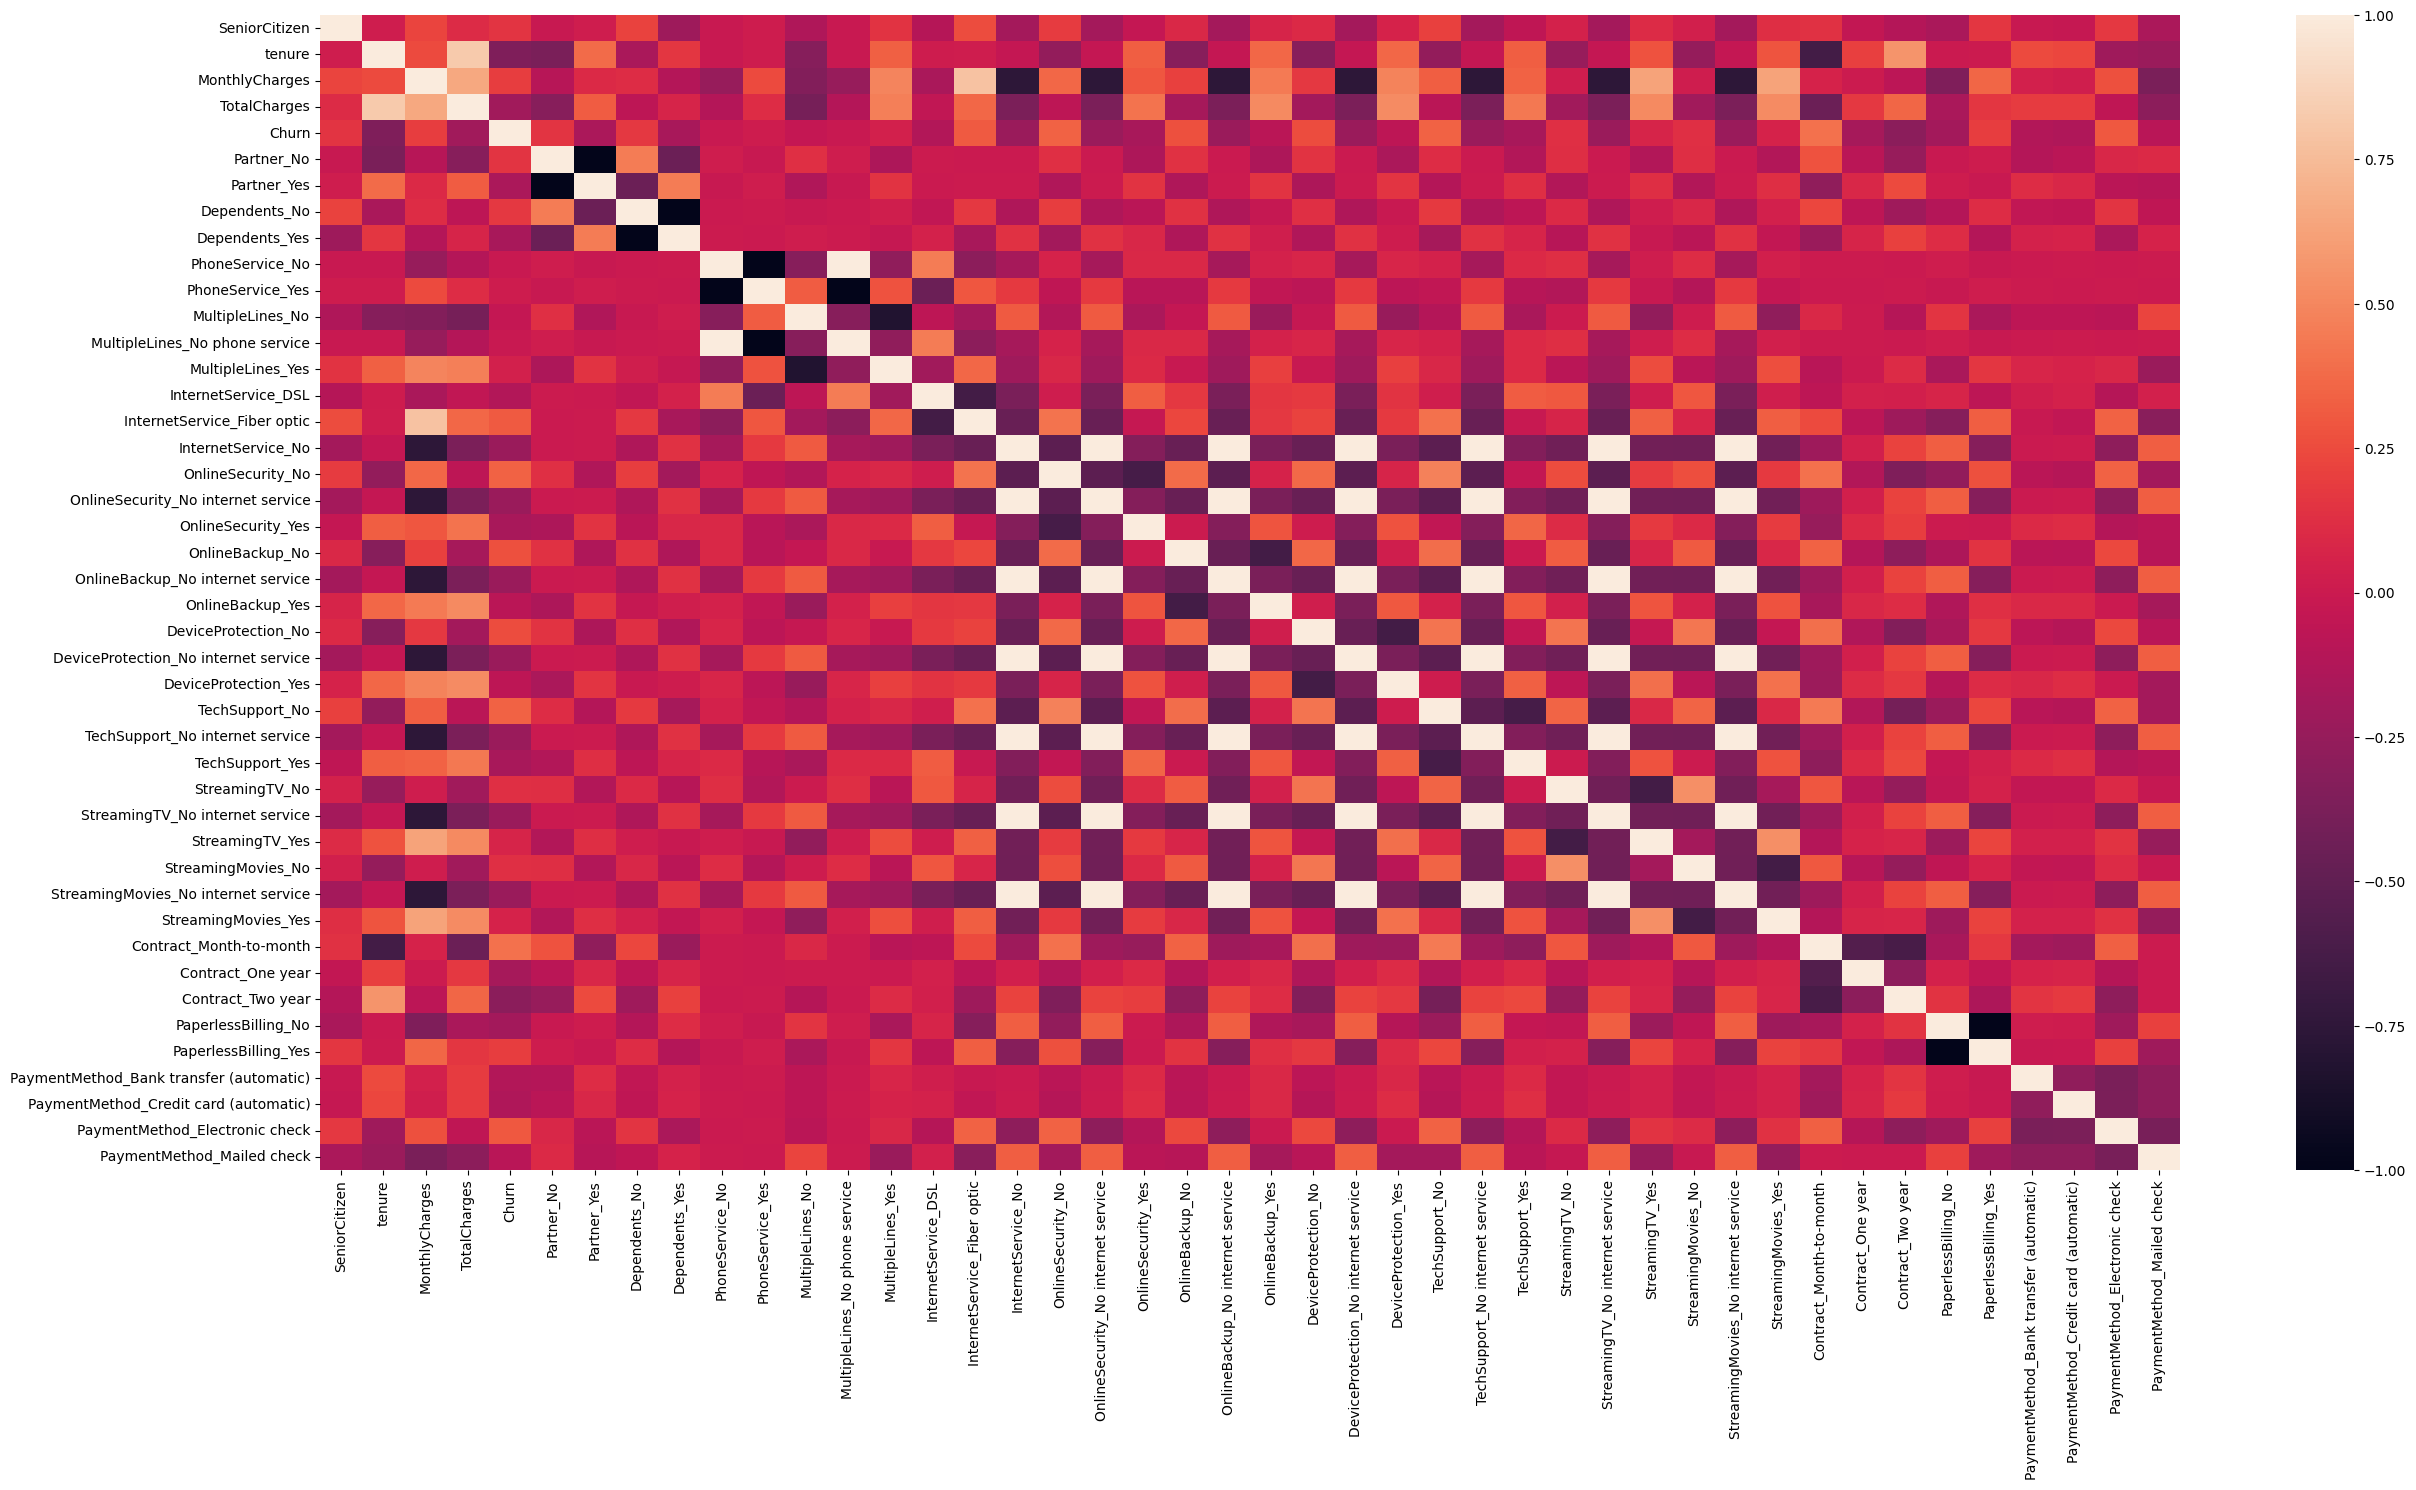

In [76]:
# Visualize a heatmap for our features correlation values
plt.figure(figsize = (30, 15))
x = sns.heatmap(dummy_df2.corr())

## Splitting the data

In [77]:
x,y = dummy_df2.drop("Churn", axis = 1), dummy_df2["Churn"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# Logistic Regression

In [81]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

D:\Data_Analysis\Data-analysis-learning\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [101]:
# Scale the numerical features
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [102]:
# Create and fit the logistic regression model using the scaled data
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [103]:
y_pred = logreg.predict(x_test)

D:\Data_Analysis\Data-analysis-learning\Python\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(dummy_df2.drop("Churn", axis=1), dummy_df2["Churn"], test_size=0.2, random_state=42, shuffle=True)

In [105]:
# Scale the numerical features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [134]:
# Create new DataFrames with scaled features and column names
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [135]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_scaled_df, y_train)

LogisticRegression(max_iter=1000)

In [136]:
x_test_scaled_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.437749,-1.284605,-1.331629,-1.002388,-1.031376,1.031376,0.652662,-0.652662,3.034225,-3.034225,...,-0.799513,0.909638,-0.523530,-0.558353,-0.833328,0.833328,-0.530678,-0.527656,1.409146,-0.54275
1,-0.437749,0.353238,-1.316672,-0.572634,0.969579,-0.969579,0.652662,-0.652662,-0.329573,0.329573,...,-0.799513,0.909638,-0.523530,-0.558353,-0.833328,0.833328,1.884380,-0.527656,-0.709650,-0.54275
2,-0.437749,0.803645,-1.512772,-0.557043,-1.031376,1.031376,-1.532186,1.532186,-0.329573,0.329573,...,-0.799513,-1.099339,-0.523530,1.790982,1.200007,-1.200007,-0.530678,-0.527656,-0.709650,1.84247
3,-0.437749,-1.284605,0.381756,-0.979588,0.969579,-0.969579,0.652662,-0.652662,-0.329573,0.329573,...,-0.799513,0.909638,-0.523530,-0.558353,1.200007,-1.200007,-0.530678,-0.527656,1.409146,-0.54275
4,-0.437749,1.417836,-0.475768,0.428565,0.969579,-0.969579,0.652662,-0.652662,-0.329573,0.329573,...,-0.799513,-1.099339,-0.523530,1.790982,1.200007,-1.200007,1.884380,-0.527656,-0.709650,-0.54275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,-0.437749,1.294997,0.114195,0.923359,-1.031376,1.031376,0.652662,-0.652662,-0.329573,0.329573,...,1.250762,-1.099339,-0.523530,1.790982,-0.833328,0.833328,-0.530678,-0.527656,-0.709650,1.84247
1405,-0.437749,0.762699,1.501854,1.501702,-1.031376,1.031376,-1.532186,1.532186,-0.329573,0.329573,...,1.250762,-1.099339,1.910109,-0.558353,1.200007,-1.200007,-0.530678,1.895175,-0.709650,-0.54275
1406,-0.437749,-0.629468,-1.494492,-0.867511,-1.031376,1.031376,-1.532186,1.532186,-0.329573,0.329573,...,-0.799513,-1.099339,1.910109,-0.558353,1.200007,-1.200007,1.884380,-0.527656,-0.709650,-0.54275
1407,-0.437749,1.499728,-0.695134,0.295876,-1.031376,1.031376,-1.532186,1.532186,3.034225,-3.034225,...,1.250762,-1.099339,-0.523530,1.790982,-0.833328,0.833328,-0.530678,1.895175,-0.709650,-0.54275


In [137]:
# Make predictions on the test set
y_pred = logreg.predict(x_test_scaled_df)
y_train_pred = logreg.predict(x_train_scaled_df)

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [117]:
accuracy_score(y_test, y_pred)

0.8204400283889283

# Accuracy is 82%

[[934 102]
 [151 222]]


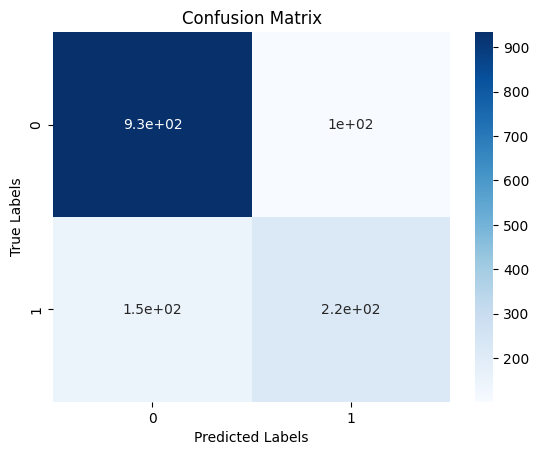

In [121]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [155]:
def print_metrics(y_train, y_train_pred, y_test, y_pred):
    from sklearn.metrics import precision_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import recall_score
    print(f'Training metric:')
    print(f'Training Precision: ', round(precision_score(y_train, y_train_pred),3))
    print(f'Training Recall: ', round(recall_score(y_train, y_train_pred),3))
    print(f'Training Accuracy: ', round(accuracy_score(y_train, y_train_pred),3))
    print(f'Training F1-Score: ', round(f1_score(y_train, y_train_pred),3))
    
    print(f'Testing Metrics:')
    print(f'Testing Precision: ', round(precision_score(y_test, y_pred),3))
    print(f'Testing Recall: ', round(recall_score(y_test, y_pred),3))
    print(f'Testing Accuracy: ', round(accuracy_score(y_test, y_pred),3))
    print(f'Testing F1-Score: ', round(f1_score(y_test, y_pred),3))

In [156]:
print_metrics(y_train, y_train_pred, y_test, y_pred)

Training metric:
Training Precision:  0.655
Training Recall:  0.54
Training Accuracy:  0.802
Training F1-Score:  0.592
Testing Metrics:
Testing Precision:  0.474
Testing Recall:  0.491
Testing Accuracy:  0.721
Testing F1-Score:  0.482


# Decision Trees


In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

In [144]:
dtc = DecisionTreeClassifier()
mm = MinMaxScaler()

In [146]:
#split test and train
x, y = dummy_df2.drop('Churn', axis = 1), dummy_df2['Churn']

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state= 42)

In [149]:
x_train_scaled = mm.fit_transform(x_train)
x_test_scaled = mm.fit_transform(x_test)

In [161]:
dtc.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [162]:
y_pred = dtc.predict(x_test_scaled)
y_train_pred = dtc.predict(x_train_scaled)

In [163]:
print_metrics(y_train, y_train_pred, y_test, y_pred)

Training metric:
Training Precision:  0.997
Training Recall:  0.995
Training Accuracy:  0.998
Training F1-Score:  0.996
Testing Metrics:
Testing Precision:  0.473
Testing Recall:  0.488
Testing Accuracy:  0.72
Testing F1-Score:  0.48


In [165]:
accuracy_score(y_test, y_pred)

0.7203690560681334